In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from os import listdir
from os.path import isfile, join

from scipy.signal import find_peaks
from scipy.optimize import curve_fit
from scipy import asarray as ar,exp
from scipy.interpolate import interp1d

from SiPM import SiPMClass
from WaveformGenerator import WaveformClass
from NSB import NSBClass
from Shower import ShowerClass
import ROOT as root
import pickle

created SiPM class
created NSB class
created shower class
created waveform class
Welcome to JupyROOT 6.16/00


In [2]:
def load_object(file_name):
    try:
        with open(file_name, "rb") as f:
            data = pickle.load(f)
            return data
    except Exception as ex:
        print("Error during unpickling object (Possibly unsupported):", ex)

In [5]:
def get_waveforms_1px_ac(data, range_points, start = 20, baseline_start = 20, n_skip = 5):
    
    n_waveforms = len(data.amplitude_lsb)
    amplitude_cross_ac = np.zeros(n_waveforms)
    amplitude_1_baseline = np.zeros(n_waveforms)
    
    amplitude_rebins_all = []
    
    for event in range (0 , n_waveforms):
        
        amplitude_rebins = data.amplitude_lsb[event][::n_skip][start:start+range_points]
        
        amplitude_rebins_all.append(amplitude_rebins)
                
        amplitude_1_baseline[event] = np.mean(data.amplitude_lsb[event][::n_skip][baseline_start:baseline_start+range_points])
        amplitude_cross_ac[event] = np.max(amplitude_rebins)

    return amplitude_1_baseline, amplitude_cross_ac, amplitude_rebins_all
        
        

In [3]:
NUV_HD_25um_03p_MT_data = load_object('/run/media/andrii/Новый том/Terzina_sim/sim_results/25um/850ns/NUVHD-25um-MT_px_0.033_waveforms_data.pickle')

In [6]:
n_points = 20
n_start = 40
baseline_start = 40
n_skip = 5

baseline_25um_03p_mt_data, amplimax_ac_25um_03p_mt_data, wf_25um_03p_mt_data = get_waveforms_1px_ac(NUV_HD_25um_03p_MT_data, range_points = n_points, start = n_start, baseline_start =baseline_start, n_skip = n_skip)

Text(0.5, 0, 'time, s')

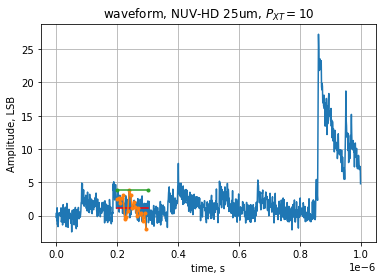

In [13]:
event = 0
plt.plot(NUV_HD_25um_03p_MT_data.time, NUV_HD_25um_03p_MT_data.amplitude_lsb[event], '-')
plt.plot([NUV_HD_25um_03p_MT_data.time[::n_skip][baseline_start], NUV_HD_25um_03p_MT_data.time[::n_skip][baseline_start+n_points]], [baseline_25um_03p_mt_data[event], baseline_25um_03p_mt_data[event]], 'r')
plt.plot(NUV_HD_25um_03p_MT_data.time[::n_skip][n_start:n_start+n_points], wf_25um_03p_mt_data[event], '.-')
plt.plot([NUV_HD_25um_03p_MT_data.time[::n_skip][n_start], NUV_HD_25um_03p_MT_data.time[::n_skip][n_start+n_points]], 
         [amplimax_ac_25um_03p_mt_data[event], amplimax_ac_25um_03p_mt_data[event]], '.-')

plt.grid()
plt.title('waveform, NUV-HD 25um, $P_{XT} = 10%$')
plt.ylabel('Amplitude, LSB')
plt.xlabel('time, s')

In [15]:
NUV_HD_25um_03p_MT_data.sipm.name

'NUVHD-25um-MT'

In [ ]:
ap_test = NUV_HD_25um_03p_MT_data.amplitude_lsb[event] - NUV_HD_25um_03p_MT_data.amplitude_lsb[event]

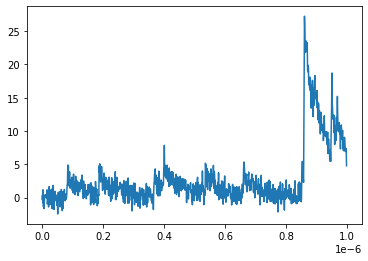

In [14]:
plt.plot(NUV_HD_25um_03p_MT_data.time, NUV_HD_25um_03p_MT_data.amplitude_lsb[event], '-')